In [2]:
from utility import *

In [13]:
f = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/未命名文件夹/2021-03-01/' + 'Bias-Spectroscopy' + '{}'.format(9).zfill(5) + '.dat')
data = f.data

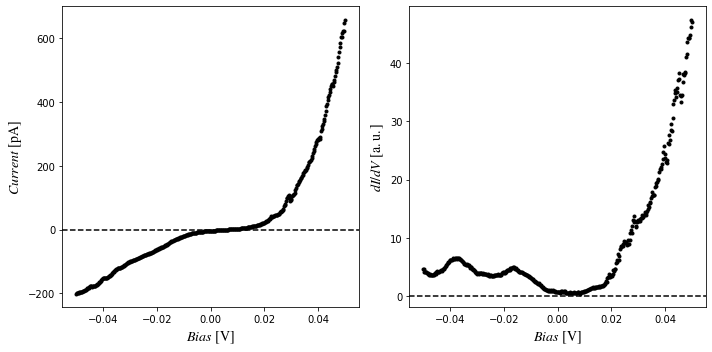

In [15]:
fig, axis = plt.subplots(1, 2, figsize = (10, 5), sharex = True)
for i in range(len(data)):
    axis[0].plot(data[i][0], (data[i][4] + data[i][1]) / 2 * 1e12, '.', color = 'black')
    axis[1].plot(data[i][0], (data[i][2] + data[i][5]) / 2 * 1e12, '.', color = 'black')
axis[0].axhline(y = 0, ls = '--',color = 'black')
axis[1].axhline(y = 0, ls = '--',color = 'black')
axis[0].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis[1].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis[0].set_ylabel(r'$Current\ \mathrm{[pA]}$', fontsize = 14)
axis[1].set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/未命名文件夹/spec_FeSe_1ML_50mV600pA.jpg', dpi = 600)

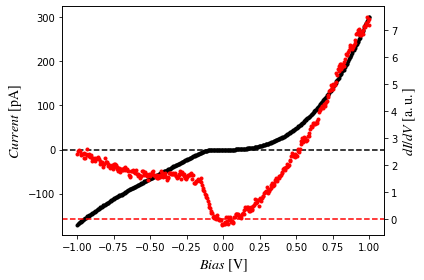

In [23]:
fig, axis_IV = plt.subplots()
axis_spec = axis_IV.twinx()
for i in range(len(data)):
    axis_IV.plot(data[i][0], (data[i][4] + data[i][1]) / 2 * 1e12, '.', color = 'black')
    axis_spec.plot(data[i][0], (data[i][2] + data[i][5]) / 2 * 1e12, '.', color = 'red')

axis_IV.axhline(y = 0, ls = '--', color = 'black')
axis_spec.axhline(y = 0, ls = '--', color = 'r')
axis_IV.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis_IV.set_ylabel(r'$Current\ \mathrm{[pA]}$', fontsize = 14)
axis_spec.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
fig.tight_layout();

In [ ]:
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20201210/spec_FeSe_1', dpi = 600)

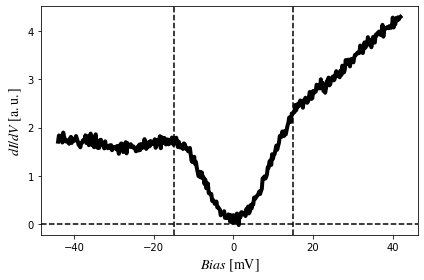

In [31]:
fig, axis = plt.subplots()

for i in [7]:
    f_spec = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/未命名文件夹/2021-03-15/' + 'Bias-Spectroscopy' + '{}'.format(i).zfill(5) + '.dat')
    axis.plot((f_spec.data[:, 0] - 0.008) * 1e3, (f_spec.data[:, 2] + f_spec.data[:, 5]) / 2 * 1e12, ls = '-', lw = 4, color = 'black')
# axis.set_ylim(0, 3e-11);
axis.axvline(x = -15, ls = '--', color = 'black')
axis.axvline(x = 15, ls = '--', color = 'black')
axis.axhline(y = 0, ls = '--', color = 'black')
axis.set_xlabel(r'$Bias\ \mathrm{[mV]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)

fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20201124/spec_FeSe_1ML_50mV100pA.jpg', dpi = 600)

In [4]:
f_specs = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/未命名文件夹/2021-03-12/' + 'Grid Spectroscopy' + '{}'.format(7).zfill(3) + '.3ds')

In [557]:
from scipy.optimize import curve_fit 
from scipy import integrate
def normal_distribution(E = 0, sigma = 2e-3):
    return 1/(np.sqrt(2) * np.pi * sigma) * np.exp(-E ** 2 / (2 * (sigma ** 2)))

def FD(E, T):
    k_B = 8.617333262145e-5
    return 1/(np.exp(E/(k_B * T)) + 1)

def DFD(E, bias, T):
    k_B = 8.617333262145e-5 
    return (np.exp((E + bias)/(k_B * T))/k_B * T) / ((E + bias)/(k_B * T) + 1) ** 2

def dynes_func(E, delta, Gamma, offset, N, c):
    return N * np.abs(np.real(((E - offset)- 1j * Gamma)/(((E - offset) - 1j * Gamma) ** 2 - delta ** 2) ** 0.5)) + c

# def tip_poly(bias, dos, rank = 2):
#     index = []
#     for i in range(len(bias)):
#         if (bias[i] <= -20e-3) or (bias[i] >= 30e-3):
#             index.append(i)
#         else:
#             continue
#     # polynominal
#     bias_slice = bias[index]
#     dos_slice = dos[index]
#     p = np.polyfit(bias_slice, dos_slice, rank)
#     return np.poly1d(p)

def tip_poly(bias, a, b, c, d, e):
    return a * bias ** 4 + b * bias ** 3 + c * bias ** 2 + d * bias ** 1 + e

def spectrum_intergrand(bias, dos, rank, delta, Gamma, offset, T, N, constant):
    return DFD(bias, T) * tip_poly(bias, dos, rank) * dynes_func(bias, delta, Gamma, offset, N, constant)

def spectrum_fitting(bias, a, b, c, d, e, rank, delta, Gamma, offset, T, N, constant):
    return integrate.quad(DFD(E, bias, T) * tip_poly(bias, a, b, c, d, e,) * dynes_func(E, delta, Gamma, offset, N, constant), -np.inf, np.inf)

dos = sperun_fitting

In [225]:
from scipy.optimize import curve_fit
f_spec = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/未命名文件夹/2021-03-15/' + 'Bias-Spectroscopy' + '{}'.format(7).zfill(5) + '.dat')

In [544]:
bias = f_spec.data[:, 0]
# spec_0 = f_spec.data[:, 2]
# spec_1 = f_spec.data[:, 5]
dos = f_spec.data[:, [2, 5]]
# for i in range(dos.shape[1]):
#     dos[:, i]= dos[:, i] / dos[0, i]

In [563]:
f_spec.header

{'Saved Date': '15.03.2021 20:18:57',
 'X (m)': '-250.505E-9',
 'Y (m)': '-188.692E-9',
 'Z (m)': '-20.3785E-9',
 'Z offset (m)': '0E+0',
 'Settling time (s)': '2E-3',
 'Integration time (s)': '20E-3',
 'Z-Ctrl hold': 'TRUE',
 'Start time': '15.03.2021 20:18:20'}

In [559]:
# index = []
# for i in range(len(bias)):
#     if bias[i] <= -20e-3 or bias[i] >= 30e-3:
#         index.append(i)
#     else:
#         continue
# bias_slice = bias[index]
# dos_slice = dos[index]
# for j in range(dos_slice.shape[1] - 1):
#     bias_slice = np.append(bias_slice, bias_slice)
# dos_slice = dos_slice.reshape(dos_slice.size, 1)
# a = spectrum_intergrand()
# poly_background = np.poly1d(p[:, 0])
# popt,pcov = curve_fit(spectrum_fitting, bias, dos[:, 0])
tip = tip_poly(bias, dos[:, 0], 2)

In [560]:
tip

poly1d([6.80762284e-10, 1.87027946e-11, 1.66232948e-12])

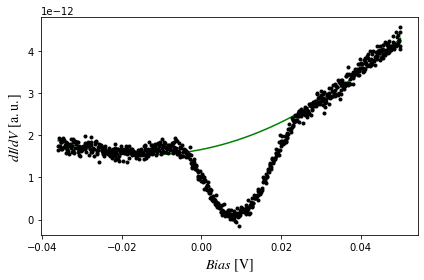

In [561]:
fig, axis = plt.subplots()
# axis.plot(bias, dynes_func(bias, 1.01233721,  0.00597099, -0.98060467,  0.04378931,  0.72091329), color = 'red')
# axis.plot(bias, gap_fitting(bias, 1.01233721,  0.00597099, -0.98060467,  0.04378931,  0.72091329), color = 'black')
axis.plot(bias, tip(bias), color = 'green')
# axis.plot(bias, dos[:, 1] / poly_background(bias), '.')
axis.plot(bias, dos, '.', color = 'black')
axis.set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
fig.tight_layout();